In [ ]:
# first cell imports all the necessary packages, functions, and classes
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from analysis_classes import *
from analysis_funcs_and_consts import *

#set font to arial
plt.rcParams['font.family'] = 'Arial'
FR_vec_color = '0.9'
FR_vec_width = 1.5




In [ ]:
#get a dictionary with all cells as Cell objects
db_Analysis = DB_Analysis()
db_conditions = {(True, STRAIN) :['CKII', 'SST']}
params={}
result = db_Analysis.run_analysis_func('median ISI', db_conditions, Cell.calc_isi, params, all=False, save=False)

# Fig 6 - Tuning drift

## Single cell examples

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_single_cell_heatmap(cell,part='first_half',save=False, with_colorbar=False,max_val=None):
    FR_mat = FR_mats_with_halves_all_cells[cell.strain][cell.name][part]
    FR_vec=np.mean(FR_mat,axis=0)
    FR_vec = smooth(FR_vec,3)
    if max_val == None:
        max_val=np.round(np.max(FR_vec),1)
    figsize_mm = (16, 16)
    if with_colorbar:
        # Add extra space for the colorbar, e.g., 5mm
        additional_width_mm = figsize_mm[0] * (0.335) # 20 * 0.15 = 3mm 0.05 is for the colorbar, 0.1 is for the padding
        figsize_mm = (figsize_mm[0] + additional_width_mm, figsize_mm[1])
    figsize_inch = (figsize_mm[0] / 25.4, figsize_mm[1] / 25.4)
    fig, ax = plt.subplots(figsize=figsize_inch)

    img = ax.imshow(FR_mat, aspect='auto', cmap='viridis')
    yticks_labels = [FR_mat.shape[0]]
    plt.yticks([FR_mat.shape[0] - 1], yticks_labels, fontsize=SVG_TICKS)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_tick_params(width=0,pad=0)

    ax2 = ax.twinx()
    ax2.plot(FR_vec, color='#e6e6e6', linewidth=1)
    # ax2.plot(FR_vec, color='0.9', linewidth=1.5)
    ax2.set_ylim(0, max_val)
    # yticks_labels = [int(round(max_val,1))]
    # ax2.set_yticks([round(max_val,1)], yticks_labels, color='k', fontsize=SVG_TICKS)
    ax2.set_yticks([])
    if cell.name == 'SRK1_X_39_1':
        xticks_labels = [0, 160]
        ax.set_xticks([0, 47], xticks_labels, fontsize=SVG_TICKS)
    else:
        ax.set_xticks([])

    # plt.ylabel('Avg. FR (Hz)', fontsize=SVG_LABELS, color='k', rotation=270, labelpad=5)
    #remove top and right spines
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.yaxis.set_tick_params(width=0,pad=0)
    img.set_clim(0, max_val*2) #used to be 0, max_val*1.5
    # make background transparent
    fig.patch.set_alpha(0)
    if with_colorbar:
        cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.1, aspect=15)#, shrink=0.5)
        cbar.set_ticks([0, max_val*2])
        cbar.set_ticklabels([0, max_val*2])
        cbar.ax.tick_params(labelsize=SVG_TICKS)
        cbar.outline.set_visible(False)
        cbar.ax.yaxis.set_tick_params(width=0,pad=0)
    if save:
        plt.savefig(r"\\ems.elsc.huji.ac.il\adam-lab\Adam-Lab-Shared\Presentations\Rotem\PPT slides of data by subjects\vectorized_figures\5- Longi\Panels\Example heatmaps/"+cell.name+"_FR_mat_viridis_"+part+".svg",format='svg',bbox_inches='tight',dpi=300)

    plt.show()

def plot_cell_pair_heatmap(cell1, cell2, part='first_half', save=False, with_colorbar=False):
    FR_mat1 = FR_mats_with_halves_all_cells[cell1.strain][cell1.name][part]
    FR_mat2 = FR_mats_with_halves_all_cells[cell2.strain][cell2.name][part]
    FR_vec1 = np.mean(FR_mat1, axis=0)
    FR_vec2 = np.mean(FR_mat2, axis=0)
    FR_vec1 = smooth(FR_vec1, 3)
    FR_vec2 = smooth(FR_vec2, 3)
    max_val = np.round(np.max([FR_vec1, FR_vec2]), 1)
    for cell in [cell1, cell2]:
        if cell==cell1:   
            plot_single_cell_heatmap(cell, part=part, save=save, with_colorbar=False, max_val=max_val)
        else:
            plot_single_cell_heatmap(cell, part=part, save=save, with_colorbar=with_colorbar, max_val=max_val)

def plot_single_cell_heatmap_for_PDF(cell, ax, part='first_half', max_val=None):
    FR_mat = FR_mats_with_halves_all_cells[cell.strain][cell.name][part]
    FR_vec = smooth(np.mean(FR_mat, axis=0), 3)
    if max_val is None:
        max_val = np.round(np.max(FR_vec), 1)

    # Plot heatmap
    img = ax.imshow(FR_mat, aspect='auto', cmap='viridis')
    img.set_clim(0, max_val * 2)  # Consistent with your other code

    # Y ticks: show just lap count or minimal
    ax.set_yticks([FR_mat.shape[0] - 1])
    ax.set_yticklabels([FR_mat.shape[0]], fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_tick_params(width=0, pad=0)

    # No x ticks (except for special case)
    if cell.name == 'SRK1_X_39_1':
        ax.set_xticks([0, 47])
        ax.set_xticklabels([0, 160], fontsize=SVG_TICKS)
    else:
        ax.set_xticks([])

    # Overlay trace
    ax2 = ax.twinx()
    ax2.plot(FR_vec, color='#e6e6e6', linewidth=1)
    ax2.set_ylim(0, max_val)
    ax2.set_yticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.yaxis.set_tick_params(width=0, pad=0)

    # Transparent background
    ax.figure.patch.set_alpha(0)

def plot_cell_pair_heatmap_for_PDF(cell1, cell2, axs, part='first_half', max_val=None):
    """
    Plots heatmaps for a pair of cells side by side in the given axes (axs should be a list of length 2).
    """
    FR_mat1 = FR_mats_with_halves_all_cells[cell1.strain][cell1.name][part]
    FR_mat2 = FR_mats_with_halves_all_cells[cell2.strain][cell2.name][part]
    FR_vec1 = smooth(np.mean(FR_mat1, axis=0), 3)
    FR_vec2 = smooth(np.mean(FR_mat2, axis=0), 3)
    
    if max_val is None:
        max_val = np.round(np.max([FR_vec1, FR_vec2]), 1)
    
    # Plot for cell1
    plot_single_cell_heatmap_for_PDF(cell1, axs[0], part=part, max_val=max_val)
    axs[0].set_title(f"{cell1.name} ({part})", fontsize=10)
    
    # Plot for cell2
    plot_single_cell_heatmap_for_PDF(cell2, axs[1], part=part, max_val=max_val)
    axs[1].set_title(f"{cell2.name} ({part})", fontsize=10)



### Correlated spatial activity examples

COP7_R1_4_2 - COP7_R1_16_2


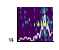

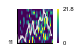

RCK10_X_7_3 - RCK10_X_18_3


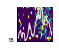

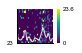

SRK1_R1_32_3 - SRK1_R1_46_a_3


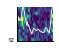

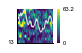

In [ ]:
cells_lst=[]
cells = ["COP7_R1_4_2", "COP7_R1_16_2","RCK10_X_7_3","RCK10_X_18_3","SRK1_R1_32_3","SRK1_R1_46_a_3"] #"CRK8_X_4_6","CRK8_X_21_6"
for cell in result.keys():
    if cell.name in cells:
        cells_lst.append(cell)

sorted_pairs = sorted(zip(cells_lst[::2], cells_lst[1::2]), key=lambda x: x[0].intseq)
#sort each pair by the intseq
sorted_pairs = [(cell1, cell2) if cell1.intseq < cell2.intseq else (cell2, cell1) for cell1, cell2 in sorted_pairs]
#print the names of the cells in the pairs
for cell1, cell2 in sorted_pairs:
    print(f"{cell1.name} - {cell2.name}")
    plot_cell_pair_heatmap(cell1, cell2, part='first_half', save=False, with_colorbar=True)

### Uncorrelated examples

COP7_R1_23_5 - COP7_R1_35_5


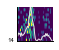

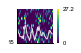

SRK1_X_32_1 - SRK1_X_45_1


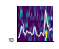

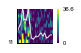

In [ ]:
cell_lst_uncorrelated = []
cells = ["COP7_R1_23_5", "COP7_R1_35_5","SRK1_X_32_1","SRK1_X_45_1"]
for cell in result.keys():
    if cell.name in cells:
        cell_lst_uncorrelated.append(cell)

sorted_pairs_uncor = sorted(zip(cell_lst_uncorrelated[::2], cell_lst_uncorrelated[1::2]), key=lambda x: x[0].intseq)
#sort each pair by the intseq
sorted_pairs_uncor = [(cell1, cell2) if cell1.intseq < cell2.intseq else (cell2, cell1) for cell1, cell2 in sorted_pairs_uncor]
#print the names of the cells in the pairs
for cell1, cell2 in sorted_pairs_uncor:
    print(f"{cell1.name} - {cell2.name}")
    plot_cell_pair_heatmap(cell1, cell2, part='first_half', save=True, with_colorbar=True)


## Sorted heatmaps

In [ ]:
def plot_heatmaps(mat1, mat2, mat3, cmap, bins_num, SVG_TICKS, figsize_mm=(80, 40),save_flag=False,strain='CKII'):
    figsize_inch = (figsize_mm[0]/25.4, figsize_mm[1]/25.4)
    fig, ax = plt.subplots(1, 3, figsize=figsize_inch)
    
    for i, mat in enumerate([mat1, mat2, mat3]):
        ax[i].imshow(mat, aspect='auto', cmap=cmap)
        ax[i].set_yticks([0, len(mat)-1], [1, len(mat)], fontsize=SVG_TICKS)
        ax[i].tick_params(axis='y', labelsize=SVG_TICKS)  # Set the fontsize for y-ticks
        ax[i].set_xticks([0, bins_num-1])
        if strain == 'SST':
            ax[i].set_xticklabels([0, 160], fontsize=SVG_TICKS)
        else:
            ax[i].set_xticks([])
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        if i > 0:  # Only remove y-ticks for the second and third plots
            ax[i].set_yticks([])

    # Add spacing between the subplots
    plt.subplots_adjust(wspace=0.25)
    if save_flag:
        plt.savefig(r"Z:/Adam-Lab-Shared/Presentations/Rotem/PPT slides of data by subjects/vectorized_figures/5- Longi/Panels/pop. heatmaps/{}_3_heatmaps_{}.svg".format(strain, len(mat1)), format='svg', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
all_heatmaps = []
time_interval = [11,15] # sessions are 11 to 15 days apart
bins_num = 48
smooth_fac=3

CKII_count = 0 ; CKII_count_PC = {'W0':0, 'W2':0}
SST_count = 0 ; SST_count_PC = {'W0':0, 'W2':0}
CKII_mat_1 = np.zeros(bins_num); CKII_mat_2 = np.zeros(bins_num) ; CKII_mat_3 = np.zeros(bins_num)
SST_mat_1 = np.zeros(bins_num); SST_mat_2 = np.zeros(bins_num) ; SST_mat_3 = np.zeros(bins_num)

for strain in ["CKII", "SST"]:
    all_strain_IDs = list(set(cell.identity for cell in result.keys() if cell.strain == strain))
    for id in all_strain_IDs:
        max_pair = get_session_pair_by_PC(
            id,
            time_interval=time_interval,
            include_remap=True,
            require_first_regular=True,
            require_first_regular_second_remap=False
        )
        if len(max_pair) == 0:
            continue
        if (
            (is_PC_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['full'] == True) or
            (max_pair[1].remapping == True and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half'] == True) or
            (max_pair[1].remapping == False and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['full'] == True)
        ):
            mat1 = FR_mats_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half'] 
            mat2 = FR_mats_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['second_half']
            mat3 = FR_mats_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half']
            # if mat2.shape[0] < 8 or mat1.shape[0] < 8 or mat3.shape[0] < 8:
            if mat2.shape[0] < 1 or mat1.shape[0] < 1 or mat3.shape[0] < 1:
                continue
            vec1 = normalize(smooth(np.mean(mat1, axis=0), smooth_fac))
            vec2 = normalize(smooth(np.mean(mat2, axis=0), smooth_fac))
            vec3 = normalize(smooth(np.mean(mat3, axis=0), smooth_fac))
            if strain == 'CKII':
                CKII_count += 1
                CKII_mat_1 = np.vstack((CKII_mat_1, vec1))
                CKII_mat_2 = np.vstack((CKII_mat_2, vec2))
                CKII_mat_3 = np.vstack((CKII_mat_3, vec3))
            else:
                SST_count += 1
                SST_mat_1 = np.vstack((SST_mat_1, vec1))
                SST_mat_2 = np.vstack((SST_mat_2, vec2))
                SST_mat_3 = np.vstack((SST_mat_3, vec3))

if CKII_mat_1.ndim > 1:
    CKII_mat_1 = CKII_mat_1[1:]
    CKII_mat_2 = CKII_mat_2[1:]
    CKII_mat_3 = CKII_mat_3[1:]
    sorted_CKII_mat_1, sorted_indices_CKII = sort_rows_by_max_index(CKII_mat_1)
    sorted_CKII_mat_2 = CKII_mat_2[sorted_indices_CKII]
    sorted_CKII_mat_3 = CKII_mat_3[sorted_indices_CKII]
else:
    sorted_CKII_mat_1 = CKII_mat_1
    sorted_CKII_mat_2 = CKII_mat_2
    sorted_CKII_mat_3 = CKII_mat_3

if SST_mat_1.ndim > 1:
    SST_mat_1 = SST_mat_1[1:]
    SST_mat_2 = SST_mat_2[1:]
    SST_mat_3 = SST_mat_3[1:]
    sorted_SST_mat_1, sorted_indices_SST = sort_rows_by_max_index(SST_mat_1)
    sorted_SST_mat_2 = SST_mat_2[sorted_indices_SST]
    sorted_SST_mat_3 = SST_mat_3[sorted_indices_SST]
else:
    sorted_SST_mat_1 = np.vstack((SST_mat_1, SST_mat_1))
    sorted_SST_mat_2 = np.vstack((SST_mat_2, SST_mat_2))
    sorted_SST_mat_3 = np.vstack((SST_mat_3, SST_mat_3))


if CKII_count > 0 or SST_count > 0:
    all_heatmaps.append({
        'interval': time_interval,
        'CKII1': sorted_CKII_mat_1,
        'CKII2': sorted_CKII_mat_2,
        'CKII3': sorted_CKII_mat_3,
        'SST1': sorted_SST_mat_1,
        'SST2': sorted_SST_mat_2,
        'SST3': sorted_SST_mat_3
    })





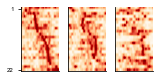

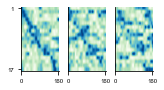

In [ ]:
# For CKII heatmaps
plot_heatmaps(sorted_CKII_mat_1, sorted_CKII_mat_2, sorted_CKII_mat_3, cmap='OrRd', bins_num=bins_num, SVG_TICKS=SVG_TICKS,save_flag=False,strain='CKII',figsize_mm=(60, 30)) #smaller size was (55, 25)

# For SST heatmaps
plot_heatmaps(sorted_SST_mat_1, sorted_SST_mat_2, sorted_SST_mat_3, cmap='GnBu', bins_num=bins_num, SVG_TICKS=SVG_TICKS,save_flag=False,strain='SST',figsize_mm=(60, 30)) #prev size was (60, 35)

In [ ]:
all_heatmaps = []
time_interval = [11,15] # sessions are 11 to 15 days apart
bins_num = 48
smooth_fac=3

CKII_count = 0 ; CKII_count_PC = {'W0':0, 'W2':0}
SST_count = 0 ; SST_count_PC = {'W0':0, 'W2':0}
CKII_mat_1 = np.zeros(bins_num); CKII_mat_2 = np.zeros(bins_num) ; CKII_mat_3 = np.zeros(bins_num)
SST_mat_1 = np.zeros(bins_num); SST_mat_2 = np.zeros(bins_num) ; SST_mat_3 = np.zeros(bins_num)

for strain in ["CKII", "SST"]:
    all_strain_IDs = list(set(cell.identity for cell in result.keys() if cell.strain == strain))
    for id in all_strain_IDs:
        max_pair = get_session_pair_by_PC(
            id,
            time_interval=time_interval,
            include_remap=True,
            require_first_regular=True,
            require_first_regular_second_remap=False
        )
        if len(max_pair) == 0:
            continue
        if (
            (is_PC_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['full'] == True) or
            (max_pair[1].remapping == True and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half'] == True) or
            (max_pair[1].remapping == False and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['full'] == True)
        ):
            mat1 = FR_mats_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half'] 
            mat2 = FR_mats_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['second_half']
            mat3 = FR_mats_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half']
            # if mat2.shape[0] < 8 or mat1.shape[0] < 8 or mat3.shape[0] < 8:
            if mat2.shape[0] < 1 or mat1.shape[0] < 1 or mat3.shape[0] < 1:
                continue
            vec1 = smooth(np.mean(mat1, axis=0), smooth_fac)
            vec2 = smooth(np.mean(mat2, axis=0), smooth_fac)
            vec3 = smooth(np.mean(mat3, axis=0), smooth_fac)
            if strain == 'CKII':
                CKII_count += 1
                CKII_mat_1 = np.vstack((CKII_mat_1, vec1))
                CKII_mat_2 = np.vstack((CKII_mat_2, vec2))
                CKII_mat_3 = np.vstack((CKII_mat_3, vec3))
            else:
                SST_count += 1
                SST_mat_1 = np.vstack((SST_mat_1, vec1))
                SST_mat_2 = np.vstack((SST_mat_2, vec2))
                SST_mat_3 = np.vstack((SST_mat_3, vec3))

if CKII_mat_1.ndim > 1:
    CKII_mat_1 = CKII_mat_1[1:]
    CKII_mat_2 = CKII_mat_2[1:]
    CKII_mat_3 = CKII_mat_3[1:]
    sorted_CKII_mat_1, sorted_indices_CKII = sort_rows_by_max_index(CKII_mat_1)
    sorted_CKII_mat_2 = CKII_mat_2[sorted_indices_CKII]
    sorted_CKII_mat_3 = CKII_mat_3[sorted_indices_CKII]
else:
    sorted_CKII_mat_1 = CKII_mat_1
    sorted_CKII_mat_2 = CKII_mat_2
    sorted_CKII_mat_3 = CKII_mat_3

if SST_mat_1.ndim > 1:
    SST_mat_1 = SST_mat_1[1:]
    SST_mat_2 = SST_mat_2[1:]
    SST_mat_3 = SST_mat_3[1:]
    sorted_SST_mat_1, sorted_indices_SST = sort_rows_by_max_index(SST_mat_1)
    sorted_SST_mat_2 = SST_mat_2[sorted_indices_SST]
    sorted_SST_mat_3 = SST_mat_3[sorted_indices_SST]
else:
    sorted_SST_mat_1 = np.vstack((SST_mat_1, SST_mat_1))
    sorted_SST_mat_2 = np.vstack((SST_mat_2, SST_mat_2))
    sorted_SST_mat_3 = np.vstack((SST_mat_3, SST_mat_3))


if CKII_count > 0 or SST_count > 0:
    all_heatmaps.append({
        'interval': time_interval,
        'CKII1': sorted_CKII_mat_1,
        'CKII2': sorted_CKII_mat_2,
        'CKII3': sorted_CKII_mat_3,
        'SST1': sorted_SST_mat_1,
        'SST2': sorted_SST_mat_2,
        'SST3': sorted_SST_mat_3
    })





In [ ]:
def calculate_rowwise_corr_3_hetamaps(mat1, mat2, mat3):
    """
    Calculate the correlation between the same rows of the three matrices
    Store the correlation values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    corr_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate correlation.")
        return corr_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate correlation between the two halves (W0_W0)
        corr_W0_W0 = np.corrcoef(row1, row2)[0, 1]

        # Calculate correlation between the first half and the remapping session (W0_W2)
        corr_W0_W2 = np.corrcoef(row1, row3)[0, 1]

        corr_dict[i] = {'W0_W0': corr_W0_W0, 'W0_W2': corr_W0_W2}

    return corr_dict

def calculate_rowwise_EUC_distance_3_hetamaps(mat1, mat2, mat3):
    """
    Calculate the distance between the same rows of the three matrices
    Store the distance values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    dist_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate distance.")
        return dist_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate distance between the two halves (W0_W0)
        dist_W0_W0 = np.linalg.norm(row1 - row2)

        # Calculate distance between the first half and the remapping session (W0_W2)
        dist_W0_W2 = np.linalg.norm(row1 - row3)

        dist_dict[i] = {'W0_W0': dist_W0_W0, 'W0_W2': dist_W0_W2}

    return dist_dict

def calculate_rowwise_COM_distance_3_hetamaps(mat1, mat2, mat3):
    """
    Compute COM distances between rows (spatial activity vectors) in three matrices:
    - mat1: first half of session W0
    - mat2: second half of session W0
    - mat3: first half of session W2

    For each row (cell), compute COM in each matrix and return absolute differences:
    - W0_W0: COM(mat1) vs COM(mat2)
    - W0_W2: COM(mat1) vs COM(mat3)
    """
    dist_dict = {}

    if mat1.shape != mat2.shape or mat1.shape != mat3.shape:
        print("Matrices must have same shape.")
        return dist_dict

    positions = np.arange(mat1.shape[1])  # Assume linear space bins
    cm_per_bin = 160 / mat1.shape[1]  # Convert bins to cm
    positions = np.array(positions, dtype=float)  # Ensure positions are float for calculations
    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        def compute_COM(row):
            total = np.sum(row)
            if total == 0:
                return np.nan  # or use 0 if preferred
            COM = np.sum(row * positions) / total
            COM_cm = COM * cm_per_bin  # Convert to cm
            return COM_cm

        com1 = compute_COM(row1)
        com2 = compute_COM(row2)
        com3 = compute_COM(row3)

        dist_dict[i] = {
            'W0_W0': np.abs(com1 - com2),
            'W0_W2': np.abs(com1 - com3)
        }

    return dist_dict

def calculate_rowwise_cosine_similarity_3_hetamaps(mat1, mat2, mat3):
    """
    Calculate the cosine similarity between the same rows of the three matrices
    Store the cosine similarity values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    cos_sim_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate cosine similarity.")
        return cos_sim_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate cosine similarity between the two halves (W0_W0)
        cos_sim_W0_W0 = np.dot(row1, row2) / (np.linalg.norm(row1) * np.linalg.norm(row2))

        # Calculate cosine similarity between the first half and the remapping session (W0_W2)
        cos_sim_W0_W2 = np.dot(row1, row3) / (np.linalg.norm(row1) * np.linalg.norm(row3))

        cos_sim_dict[i] = {'W0_W0': cos_sim_W0_W0, 'W0_W2': cos_sim_W0_W2}

    return cos_sim_dict

def calculate_rowwise_dist_between_max_3_hetamaps(mat1, mat2, mat3):
    """
    Calculate the distance between the maximum values of the same rows of the three matrices
    Store the distance values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    dist_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate distance.")
        return dist_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate distance between the two halves (W0_W0)
        max_index_row1 = np.argmax(row1)
        max_index_row2 = np.argmax(row2)
        dist_W0_W0 = np.abs(max_index_row1 - max_index_row2)

        # Calculate distance between the first half and the remapping session (W0_W2)
        max_index_row3 = np.argmax(row3)
        dist_W0_W2 = np.abs(max_index_row1 - max_index_row3)

        dist_dict[i] = {'W0_W0': dist_W0_W0, 'W0_W2': dist_W0_W2}

    return dist_dict

def calculate_rowwise_abs_peak_fr_difference_3_hetamaps(mat1, mat2, mat3):
    """
    Calculate the difference in peak firing rates between the same rows of the three matrices
    Store the difference values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    diff_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate difference.")
        return diff_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate peak firing rate difference between the two halves (W0_W0)
        peak_fr_W0_W0 = abs(np.max(row1) - np.max(row2))

        # Calculate peak firing rate difference between the first half and the remapping session (W0_W2)
        peak_fr_W0_W2 = abs(np.max(row1) - np.max(row3))

        diff_dict[i] = {'W0_W0': peak_fr_W0_W0, 'W0_W2': peak_fr_W0_W2}

    return diff_dict

def calculate_rowwise_abs_mean_fr_difference_3_hetamaps(mat1, mat2, mat3,normed=False):
    """
    Calculate the difference in mean firing rates between the same rows of the three matrices
    Store the difference values in a dictionary with first key - W0_W0 (two halves, mat1-mat2) and second key - W0_W2 (first halves, mat1-mat3)
    """
    diff_dict = {}
    if mat1.shape[0] != mat2.shape[0] or mat1.shape[0] != mat3.shape[0]:
        print("Matrices have different number of rows, cannot calculate difference.")
        return diff_dict

    for i in range(mat1.shape[0]):
        row1 = mat1[i, :]
        row2 = mat2[i, :]
        row3 = mat3[i, :]

        # Calculate mean firing rate difference between the two halves (W0_W0)
        mean_fr_W0_W0 = abs(np.mean(row1) - np.mean(row2))

        # Calculate mean firing rate difference between the first half and the remapping session (W0_W2)
        mean_fr_W0_W2 = abs(np.mean(row1) - np.mean(row3))
        if normed:
            mean_fr_W0_W0 = mean_fr_W0_W0 / np.mean(row1)
            mean_fr_W0_W2 = mean_fr_W0_W2 / np.mean(row1)

        diff_dict[i] = {'W0_W0': mean_fr_W0_W0, 'W0_W2': mean_fr_W0_W2}

    return diff_dict

#plot bar plots of the correlation values for each cell
def plot_W0_W2_violins(result_dict, cell_name,palette=[PYR_COLOR,PYR_COLOR_weak],ylabel=False,yticks=np.arange(-0.5, 1.1, 0.5),ylims=(-0.7, 1.5)):
    """
    Plot bar plots of the correlation values for each cell.
    one bar for average correlation of W0_W0 and one for W0_W2.
    scatter individual correlation values on top of the bars, and connect them with lines.
    """
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]


    #create violin plot of the correlation values
    plt.figure(figsize=(2, 3))
    sns.violinplot(data=[W0_W0_values, W0_W2_values], inner="quartile", palette=palette)

    # Scatter individual correlation values on top of the bars
    for i in range(len(result_dict)):
        plt.scatter([0,1], [W0_W0_values[i], W0_W2_values[i]], color='black', alpha=0.5)

    # Connect individual points with lines
    for i in range(len(result_dict)):
        plt.plot([0, 1], [W0_W0_values[i], W0_W2_values[i]], color='k', alpha=0.5)

    plt.xticks([0, 1], ['W0-W0', 'W0-W2'])
   
    # plt.tight_layout()
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    plt.ylim(ylims)
    plt.yticks(yticks, fontsize=12)
    diffs = np.array(W0_W0_values) - np.array(W0_W2_values)
    print(stats.shapiro(diffs))
    print(stats.ttest_rel(W0_W0_values, W0_W2_values))
    p = stats.ttest_rel(W0_W0_values, W0_W2_values)[1]
    if p > 0.05:
        plt.text(0.5, 0.9, f"p = {p:.3f}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
    else:
        if p < 0.001:
            plt.text(0.5, 0.9, "***", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
        elif p < 0.01:
            plt.text(0.5, 0.9, "**", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
        elif p < 0.05:
            plt.text(0.5, 0.9, "*", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()
    


### Generate shuffeled distributions

In [ ]:
def rowise_metric_means(mat1, mat2, metric_type='COM_dist'):
    dists_or_corrs = []
    
    for i in np.arange(mat1.shape[0]):  # matrices should be of the same size
        FR_vec1 = mat1[i,:]
        FR_vec2 = mat2[i,:]
        cm_per_bin = 160 / len(FR_vec1)  # assuming 160 cm is the total length of the track
        if metric_type == 'COM_dist':
            COM1 = np.sum([i * FR_vec1[i] for i in np.arange(len(FR_vec1))]) / np.sum(FR_vec1)
            COM2 = np.sum([i * FR_vec2[i] for i in np.arange(len(FR_vec2))]) / np.sum(FR_vec2)
            dist = abs(COM1 - COM2)
            dist_cm = dist * cm_per_bin  # convert to cm
            dists_or_corrs.append(dist_cm)
        
        elif metric_type == 'EUC_dist':
            dist = np.linalg.norm(FR_vec1 - FR_vec2)
            dists_or_corrs.append(dist)
        
        elif metric_type == 'corr':
            corr = np.corrcoef(FR_vec1, FR_vec2)[0, 1]
            dists_or_corrs.append(corr)

        elif metric_type == 'mean_FR_diff':
            mean_FR1 = np.mean(FR_vec1)
            mean_FR2 = np.mean(FR_vec2)
            dist = abs(mean_FR1 - mean_FR2)
            dists_or_corrs.append(dist)   

        elif metric_type == 'mean_FR_diff_normed':
            mean_FR1 = np.mean(FR_vec1)
            mean_FR2 = np.mean(FR_vec2)
            dist = abs(mean_FR1 - mean_FR2) / np.mean(mean_FR1)
            dists_or_corrs.append(dist)
    return np.mean(dists_or_corrs)


def generate_n_shuffled_means(mat1,mat2,metric_type='COM_dist',n_shuffles=1000):
    observed_mean = rowise_metric_means(mat1, mat2, metric_type)
    shuffled_means = []
    for i in np.arange(n_shuffles):
        shuffled_mat1 = np.random.permutation(mat1)
        shuffled_mat2 = np.random.permutation(mat2)
        shuffled_means.append(rowise_metric_means(shuffled_mat1, shuffled_mat2, metric_type))
    return observed_mean,shuffled_means

In [ ]:
observed_mean_CKII_corr_w0, shuffled_means_CKII_corr_w0 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_2, metric_type='corr', n_shuffles=1000)
observed_mean_CKII_corr_w2, shuffled_means_CKII_corr_w2 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_3, metric_type='corr', n_shuffles=1000)
observed_mean_SST_corr_w0, shuffled_means_SST_corr_w0 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_2, metric_type='corr', n_shuffles=1000)
observed_mean_SST_corr_w2, shuffled_means_SST_corr_w2 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_3, metric_type='corr', n_shuffles=1000)
observed_mean_CKII_COM_w0, shuffled_means_CKII_COM_w0 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_2, metric_type='COM_dist', n_shuffles=1000)
observed_mean_CKII_COM_w2, shuffled_means_CKII_COM_w2 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_3, metric_type='COM_dist', n_shuffles=1000)
observed_mean_SST_COM_w0, shuffled_means_SST_COM_w0 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_2, metric_type='COM_dist', n_shuffles=1000)
observed_mean_SST_COM_w2, shuffled_means_SST_COM_w2 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_3, metric_type='COM_dist', n_shuffles=1000)
observed_mean_CKII_EUC_w0, shuffled_means_CKII_EUC_w0 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_2, metric_type='EUC_dist', n_shuffles=1000)
observed_mean_CKII_EUC_w2, shuffled_means_CKII_EUC_w2 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_3, metric_type='EUC_dist', n_shuffles=1000)
observed_mean_SST_EUC_w0, shuffled_means_SST_EUC_w0 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_2, metric_type='EUC_dist', n_shuffles=1000)
observed_mean_SST_EUC_w2, shuffled_means_SST_EUC_w2 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_3, metric_type='EUC_dist', n_shuffles=1000)
shuffeled_means_corr_CKII = [np.mean(shuffled_means_CKII_corr_w0),np.mean(shuffled_means_CKII_corr_w2)]
shuffeled_means_corr_SST = [np.mean(shuffled_means_SST_corr_w0),np.mean(shuffled_means_SST_corr_w2)]
shuffeled_means_COM_CKII = [np.mean(shuffled_means_CKII_COM_w0),np.mean(shuffled_means_CKII_COM_w2)]
shuffeled_means_COM_SST = [np.mean(shuffled_means_SST_COM_w0),np.mean(shuffled_means_SST_COM_w2)]
shuffeled_means_EUC_CKII = [np.mean(shuffled_means_CKII_EUC_w0),np.mean(shuffled_means_CKII_EUC_w2)]
shuffeled_means_EUC_SST = [np.mean(shuffled_means_SST_EUC_w0),np.mean(shuffled_means_SST_EUC_w2)]

observed_mean_CKII_mean_FR_w0, shuffled_means_CKII_mean_FR_w0 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_2, metric_type='mean_FR_diff', n_shuffles=1000)
observed_mean_CKII_mean_FR_w2, shuffled_means_CKII_mean_FR_w2 = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_3, metric_type='mean_FR_diff', n_shuffles=1000)
observed_mean_SST_mean_FR_w0, shuffled_means_SST_mean_FR_w0 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_2, metric_type='mean_FR_diff', n_shuffles=1000)
observed_mean_SST_mean_FR_w2, shuffled_means_SST_mean_FR_w2 = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_3, metric_type='mean_FR_diff', n_shuffles=1000)

shuffeld_mean_mean_FR_CKII = [np.mean(shuffled_means_CKII_mean_FR_w0),np.mean(shuffled_means_CKII_mean_FR_w2)]
shuffeld_mean_mean_FR_SST = [np.mean(shuffled_means_SST_mean_FR_w0),np.mean(shuffled_means_SST_mean_FR_w2)]

observed_mean_CKII_mean_FR_w0_normed, shuffled_means_CKII_mean_FR_w0_normed = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_2, metric_type='mean_FR_diff_normed', n_shuffles=1000)
observed_mean_CKII_mean_FR_w2_normed, shuffled_means_CKII_mean_FR_w2_normed = generate_n_shuffled_means(sorted_CKII_mat_1, sorted_CKII_mat_3, metric_type='mean_FR_diff_normed', n_shuffles=1000)
observed_mean_SST_mean_FR_w0_normed, shuffled_means_SST_mean_FR_w0_normed = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_2, metric_type='mean_FR_diff_normed', n_shuffles=1000)
observed_mean_SST_mean_FR_w2_normed, shuffled_means_SST_mean_FR_w2_normed = generate_n_shuffled_means(sorted_SST_mat_1, sorted_SST_mat_3, metric_type='mean_FR_diff_normed', n_shuffles=1000)

shuffeld_mean_mean_FR_CKII_normed = [np.mean(shuffled_means_CKII_mean_FR_w0_normed),np.mean(shuffled_means_CKII_mean_FR_w2_normed)]
shuffeld_mean_mean_FR_SST_normed = [np.mean(shuffled_means_SST_mean_FR_w0_normed),np.mean(shuffled_means_SST_mean_FR_w2_normed)]




## Plotting violins

In [ ]:
def plot_combined_W0_W2_violins_with_histograms(result_dicts, shuffled_distributions_list, group_labels,
                                                palette_list, ylabel=False,
                                                yticks=np.arange(-0.5, 1.1, 0.5), ylims=(-0.7, 1.5),
                                                save_path=None, SVG_TICKS=6, SVG_LABELS=6,
                                                figsize_mm=(25, 25), offset=0.3,y_sig=1.1,sig_offsets=[0.2,0.4]):
    from scipy.stats import gaussian_kde
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    assert len(result_dicts) == 2 and len(shuffled_distributions_list) == 2

    # Collect data
    all_violin_data = []
    all_group_pos = []
    violin_labels = ["W0-W0", "W0-W2", "W0-W0", "W2-W2"]

    fig, ax = plt.subplots(figsize=(figsize_mm[0] / 25.4, figsize_mm[1] / 25.4))

    # --- Violin plotting first ---
    all_violin_data = []
    for result_dict in result_dicts:
        W0 = [res['W0_W0'] for res in result_dict.values()]
        W2 = [res['W0_W2'] for res in result_dict.values()]
        all_violin_data.extend([W0, W2])

    sns.violinplot(data=all_violin_data, ax=ax, color='white', linewidth=0.5, width=0.5,
                   inner=None, zorder=0)

    for collection in ax.collections:
        collection.set_edgecolor('gray')
    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(0.5)

    # --- Plot everything else (scatter, KDEs) on top ---
    for group_idx, (result_dict, shuffled_distributions, group_label, palette) in enumerate(
        zip(result_dicts, shuffled_distributions_list, group_labels, palette_list)):

        W0 = [res['W0_W0'] for res in result_dict.values()]
        W2 = [res['W0_W2'] for res in result_dict.values()]
        x_offset = group_idx * 2

        jitter_0 = np.random.normal(0, 0.02, size=len(W0))
        jitter_1 = np.random.normal(0, 0.02, size=len(W2))

        # Scatter plots — add zorder=2 to ensure visibility
        ax.scatter(np.zeros(len(W0)) + x_offset + jitter_0, W0,
                facecolors=palette[0], edgecolors='none', linewidths=0,
                s=2, alpha=0.8, marker='o', zorder=2)

        ax.scatter(np.ones(len(W2)) + x_offset + jitter_1, W2,
                facecolors=palette[1], edgecolors='none', linewidths=0,
                s=2, alpha=0.8, marker='o', zorder=2)

        # Connecting lines
        for i in range(len(W0)):
            ax.plot([x_offset + 0 + jitter_0[i], x_offset + 1 + jitter_1[i]],
                    [W0[i], W2[i]], color='gray', alpha=0.5, linewidth=0.5, zorder=1.5)

        # Mean points
        ax.scatter(x_offset + 0, np.mean(W0),
           facecolors='k', edgecolors='none', linewidths=0,
           s=5, marker='o', zorder=3)

        ax.scatter(x_offset + 1, np.mean(W2),
                facecolors='k', edgecolors='none', linewidths=0,
                s=5, marker='o', zorder=3)

        
        shapir_wilk_W0 = stats.shapiro(W0)
        shapir_wilk_W2 = stats.shapiro(W2)
        print(f"Shapiro-Wilk test for {group_label} W0_W0: {shapir_wilk_W0}")
        print(f"Shapiro-Wilk test for {group_label} W0_W2: {shapir_wilk_W2}")
        if shapir_wilk_W0.pvalue < 0.05 or shapir_wilk_W2.pvalue < 0.05:
            p=stats.wilcoxon(W0, W2)[1]
            print("data is not normally distributed, using Wilcoxon signed-rank test")
            print(f"Signed-rank test for {group_label} W0_W0 vs W0_W2: {stats.wilcoxon(W0, W2)}")
        else:
            p = stats.ttest_rel(W0, W2)[1]
            print("data is normally distributed, using paired t-test")
            print(f"Paired t-test for {group_label} W0_W0 vs W0_W2: {stats.ttest_rel(W0, W2)}")
        # sig_y = max(max(W0), max(W2)) + 0.05
        sig_y=y_sig
        x0 = x_offset
        x1 = x_offset + 1
        line_y = sig_y - 0.01  # line just under the text

        # Determine label
        if p > 0.05:
            sig_label = "n.s"
        elif p < 0.001:
            sig_label = "***"
        elif p < 0.01:
            sig_label = "**"
        else:
            sig_label = "*"
        # Print means and SEM
        print(f"\n{group_label} W0_W0 mean: {np.mean(W0):.3f}, SEM: {np.std(W0)/np.sqrt(len(W0)):.3f}")
        print(f"{group_label} W0_W2 mean: {np.mean(W2):.3f}, SEM: {np.std(W2)/np.sqrt(len(W2)):.3f}")
        # Draw line and text
        ax.plot([x0, x1], [line_y, line_y], color='k', linewidth=0.5)
        ax.text((x0 + x1)/2, sig_y, sig_label, ha='center', va='bottom', fontsize=SVG_TICKS)


        # KDEs
        for i, shuffled in enumerate(shuffled_distributions):
            kde = gaussian_kde(shuffled)
            y_vals = np.linspace(min(shuffled), max(shuffled), 300)
            density = kde(y_vals)
            density = density / np.max(density) * 0.2
            x_pos = x_offset + i + offset
            ax.plot(x_pos + density, y_vals, color='k', linewidth=0.7, alpha=0.7)

            lower, upper = np.percentile(shuffled, [1, 99])
            ax.plot([x_pos, x_pos + 0.2], [lower, lower], color='k', linestyle='--', linewidth=0.6)
            ax.plot([x_pos, x_pos + 0.2], [upper, upper], color='k', linestyle='--', linewidth=0.6)

            obs_mean = np.mean(W0) if i == 0 else np.mean(W2)
            p_val = 2 * min(np.mean(shuffled >= obs_mean), np.mean(shuffled <= obs_mean))
            y_peak = y_vals[np.argmax(density)]
            print(f"P-value for {group_label} W0_W0 vs shuffled: {p_val:.3f}" if i == 0 else f"P-value for {group_label} W0_W2 vs shuffled: {p_val:.3f}")

            if p_val > 0.05:
                shuffle_sig = "n.s."
            elif p_val < 0.001:
                shuffle_sig = "***"
            elif p_val < 0.01:
                shuffle_sig = "**"
            else:
                shuffle_sig = "*"
            ax.text(x_pos, y_peak, shuffle_sig, ha='center', va='center', fontsize=SVG_TICKS, rotation=90)
    # Between-group t-tests: CKII vs SST at W0_W0 and W0_W2
    CKII_W0 = [res['W0_W0'] for res in result_dicts[0].values()]
    CKII_W2 = [res['W0_W2'] for res in result_dicts[0].values()]
    SST_W0  = [res['W0_W0'] for res in result_dicts[1].values()]
    SST_W2  = [res['W0_W2'] for res in result_dicts[1].values()]

    comparisons = [
        (CKII_W0, SST_W0, 0, 2, sig_offsets[0]),  # CKII W0 vs SST W0
        (CKII_W2, SST_W2, 1, 3, sig_offsets[1])   # CKII W2 vs SST W2
    ]

    for vals1, vals2, x1, x2,offset in comparisons:
        p = stats.ttest_ind(vals1, vals2)[1]
        y1 = sig_y + offset
        line_y = y1 - 0.01

        if p > 0.05:
            label = "n.s"
        elif p < 0.001:
            label = "***"
        elif p < 0.01:
            label = "**"
        else:
            label = "*"

        ax.plot([x1, x2], [line_y, line_y], color='k', linewidth=0.5)
        ax.text((x1 + x2)/2, y1, label, ha='center', va='bottom', fontsize=SVG_TICKS)
        print(f"Between-group t-test W0_W0 (CKII vs SST): p-value = {p:.3f}" if x1==0 else f"Between-group t-test W0_W2 (CKII vs SST): p-value = {p:.3f}")
    # Aesthetics
    ax.set_ylim(ylims)
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=SVG_TICKS)
    ax.set_xticks([0, 1, 2, 3], violin_labels, fontsize=SVG_TICKS, rotation=45)

    if ylabel:
        ax.set_ylabel(ylabel, fontsize=SVG_LABELS)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.patch.set_facecolor('none')

    if save_path:
        plt.savefig(save_path, dpi=300, format=save_path.split('.')[-1], bbox_inches='tight')

    plt.show()



def shapiro_test(result_dict):
    # Perform the Shapiro-Wilk test for normality
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]
    W0_W0_stat, W0_W0_p = stats.shapiro(W0_W0_values)
    W0_W2_stat, W0_W2_p = stats.shapiro(W0_W2_values)
    print(f"W0-W0: W-stat = {W0_W0_stat}, p-value = {W0_W0_p}")
    print(f"W0-W2: W-stat = {W0_W2_stat}, p-value = {W0_W2_p}")
    return W0_W0_p, W0_W2_p

def paired_ttest(result_dict):
    # Perform the paired t-test
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]
    t_stat, p_value = stats.ttest_rel(W0_W0_values, W0_W2_values)
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    return t_stat, p_value

def wilcoxon_test(result_dict):
    # Perform the Wilcoxon signed-rank test
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]
    stat, p_value = stats.wilcoxon(W0_W0_values, W0_W2_values)
    print(f"Wilcoxon statistic: {stat}, p-value: {p_value}")
    return stat, p_value

def get_mean_SEM(result_dict):
    # Calculate mean and SEM
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]
    mean_W0_W0 = np.mean(W0_W0_values)
    mean_W0_W2 = np.mean(W0_W2_values)
    sem_W0_W0 = stats.sem(W0_W0_values)
    sem_W0_W2 = stats.sem(W0_W2_values)
    return mean_W0_W0, sem_W0_W0, mean_W0_W2, sem_W0_W2

def calc_p_val_compared_to_shuffled(result_dict,shuffled_means_W0,shuffled_means_W2):
    # Calculate p-value compared to shuffled means
    W0_W0_values = [res['W0_W0'] for res in result_dict.values()]
    W0_W2_values = [res['W0_W2'] for res in result_dict.values()]
    mean_W0_W0 = np.mean(W0_W0_values)
    mean_W0_W2 = np.mean(W0_W2_values)
    p_val_W0 = np.sum(np.array(shuffled_means_W0) >= mean_W0_W0) / len(shuffled_means_W0)
    p_val_W2 = np.sum(np.array(shuffled_means_W2) >= mean_W0_W2) / len(shuffled_means_W2)
    Z_score_W0 = (np.mean(W0_W0_values) - np.mean(shuffled_means_W0)) / np.std(shuffled_means_W0)
    Z_score_W2 = (np.mean(W0_W2_values) - np.mean(shuffled_means_W2)) / np.std(shuffled_means_W2)
    print(f"p-value W0: {p_val_W0}, p-value W2: {p_val_W2}")
    print(f"Z-score W0: {Z_score_W0}, Z-score W2: {Z_score_W2}")
    return p_val_W0, p_val_W2, Z_score_W0, Z_score_W2


In [ ]:
corrs_CKII = calculate_rowwise_corr_3_hetamaps(sorted_CKII_mat_1, sorted_CKII_mat_2, sorted_CKII_mat_3)
corrs_SST = calculate_rowwise_corr_3_hetamaps(sorted_SST_mat_1, sorted_SST_mat_2, sorted_SST_mat_3)
dists_CKII = calculate_rowwise_EUC_distance_3_hetamaps(sorted_CKII_mat_1, sorted_CKII_mat_2, sorted_CKII_mat_3)
dists_SST = calculate_rowwise_EUC_distance_3_hetamaps(sorted_SST_mat_1, sorted_SST_mat_2, sorted_SST_mat_3)
COM_CKII = calculate_rowwise_COM_distance_3_hetamaps(sorted_CKII_mat_1, sorted_CKII_mat_2, sorted_CKII_mat_3)
COM_SST = calculate_rowwise_COM_distance_3_hetamaps(sorted_SST_mat_1, sorted_SST_mat_2, sorted_SST_mat_3)

Shapiro-Wilk test for CKII W0_W0: ShapiroResult(statistic=0.948779821395874, pvalue=0.2986682951450348)
Shapiro-Wilk test for CKII W0_W2: ShapiroResult(statistic=0.9375215172767639, pvalue=0.17589691281318665)
data is normally distributed, using paired t-test
Paired t-test for CKII W0_W0 vs W0_W2: TtestResult(statistic=1.556091838072665, pvalue=0.1346291926271882, df=21)

CKII W0_W0 mean: 0.434, SEM: 0.071
CKII W0_W2 mean: 0.294, SEM: 0.066
P-value for CKII W0_W0 vs shuffled: 0.000
P-value for CKII W0_W2 vs shuffled: 0.010
Shapiro-Wilk test for SST W0_W0: ShapiroResult(statistic=0.9340130090713501, pvalue=0.2538415491580963)
Shapiro-Wilk test for SST W0_W2: ShapiroResult(statistic=0.9408059120178223, pvalue=0.32786616683006287)
data is normally distributed, using paired t-test
Paired t-test for SST W0_W0 vs W0_W2: TtestResult(statistic=4.210517731762327, pvalue=0.0006637384460053611, df=16)

SST W0_W0 mean: 0.519, SEM: 0.036
SST W0_W2 mean: 0.229, SEM: 0.064
P-value for SST W0_W0 vs sh

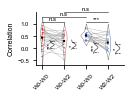

Shapiro-Wilk test for CKII W0_W0: ShapiroResult(statistic=0.8869946599006653, pvalue=0.016472266986966133)
Shapiro-Wilk test for CKII W0_W2: ShapiroResult(statistic=0.8866077661514282, pvalue=0.01618996448814869)
data is not normally distributed, using Wilcoxon signed-rank test
Signed-rank test for CKII W0_W0 vs W0_W2: WilcoxonResult(statistic=51.0, pvalue=0.01272726058959961)

CKII W0_W0 mean: 6.533, SEM: 1.242
CKII W0_W2 mean: 11.351, SEM: 1.531
P-value for CKII W0_W0 vs shuffled: 0.000
P-value for CKII W0_W2 vs shuffled: 0.022
Shapiro-Wilk test for SST W0_W0: ShapiroResult(statistic=0.8325992822647095, pvalue=0.005886719562113285)
Shapiro-Wilk test for SST W0_W2: ShapiroResult(statistic=0.6937551498413086, pvalue=9.831178613239899e-05)
data is not normally distributed, using Wilcoxon signed-rank test
Signed-rank test for SST W0_W0 vs W0_W2: WilcoxonResult(statistic=37.0, pvalue=0.0638275146484375)

SST W0_W0 mean: 4.022, SEM: 0.837
SST W0_W2 mean: 6.932, SEM: 1.794
P-value for SST W

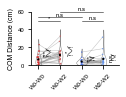

In [ ]:
plot_combined_W0_W2_violins_with_histograms(
    result_dicts=[corrs_CKII, corrs_SST],
    shuffled_distributions_list=[
        [shuffled_means_CKII_corr_w0, shuffled_means_CKII_corr_w2],
        [shuffled_means_SST_corr_w0, shuffled_means_SST_corr_w2]
    ],
    group_labels=["CKII", "SST"],
    palette_list=[
        [PYR_COLOR, PYR_COLOR_weak],
        [IN_COLOR, IN_COLOR_weak]
    ],
    ylabel="Correlation",
    yticks=np.arange(-0.5, 1.1, 0.5),
    ylims=(-0.7, 1.5),
    # save_path="Z:/Adam-Lab-Shared/Presentations/Rotem/PPT slides of data by subjects/vectorized_figures/5- Longi/Panels/Violins/combined_corr_violin_smooothing_"+str(smooth_fac)+".svg",
    SVG_TICKS=SVG_TICKS,
    SVG_LABELS=SVG_LABELS,
    figsize_mm=(40, 25),
    offset=0.35
)



plot_combined_W0_W2_violins_with_histograms(
    result_dicts=[COM_CKII, COM_SST],
    shuffled_distributions_list=[
        [shuffled_means_CKII_COM_w0, shuffled_means_CKII_COM_w2],
        [shuffled_means_SST_COM_w0, shuffled_means_SST_COM_w2]
    ],
    group_labels=["CKII", "SST"],
    palette_list=[
        [PYR_COLOR, PYR_COLOR_weak],
        [IN_COLOR, IN_COLOR_weak]
    ],
    ylabel="COM Distance (cm)",
    yticks=np.arange(0, 61, 20),
    ylims=(0, 60),
    # save_path="Z:/Adam-Lab-Shared/Presentations/Rotem/PPT slides of data by subjects/vectorized_figures/5- Longi/Panels/Violins/combined_COM_violin_smooothing_"+str(smooth_fac)+".svg",
    SVG_TICKS=SVG_TICKS,
    SVG_LABELS=SVG_LABELS,
    figsize_mm=(40, 25),
    offset=0.35,
    y_sig=50,
    sig_offsets= [4, 10]  # Adjust offsets for significance lines if needed
)


### Evens - odds correlation violins

In [ ]:
def calc_ASC_evens_odds(FR_mat):
    FR_mat_even_rows = FR_mat[::2] #take every other row
    FR_mat_odd_rows = FR_mat[1::2] #take every other row starting from the second row
    FR_vec_even = smooth(np.mean(FR_mat_even_rows,axis=0),3)
    FR_vec_odd = smooth(np.mean(FR_mat_odd_rows,axis=0),3)
    ASC = np.corrcoef(FR_vec_even,FR_vec_odd)[0,1]
    return ASC

In [ ]:
#For FR reults - normalized version is 2 cells above
time_interval = [11,15]
bins_num = 48
CKII_corrs_even_odd = []; SST_corrs_even_odd = []
for strain in ["CKII", "SST"]:
    all_strain_IDs = list(set(cell.identity for cell in result.keys() if cell.strain == strain))
    for id in all_strain_IDs:
        max_pair = get_session_pair_by_PC(
            id,
            time_interval=time_interval,
            include_remap=True,
            require_first_regular=True,
            require_first_regular_second_remap=False
        )
        if len(max_pair) == 0:
            continue
        if (
            (is_PC_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['full'] == True) or
            (max_pair[1].remapping == True and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half'] == True) or
            (max_pair[1].remapping == False and is_PC_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['full'] == True)
        ):
            FR_mat = FR_mats_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['full'] 
            # if mat2.shape[0] < 8 or mat1.shape[0] < 8 or mat3.shape[0] < 8:
            if FR_mat.shape[0] < 1:
                continue
            corr_even_odd = calc_ASC_evens_odds(FR_mat)
            if strain == "CKII":
                CKII_corrs_even_odd.append(corr_even_odd)
            elif strain == "SST":
                SST_corrs_even_odd.append(corr_even_odd)

            

Independent t-test (CKII vs SST): p-value = 0.063
ShapiroResult(statistic=0.9646371006965637, pvalue=0.5882202386856079)
ShapiroResult(statistic=0.8937150835990906, pvalue=0.053373415023088455)


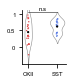

CKII mean: 0.448, SEM: 0.068
SST mean: 0.615, SEM: 0.044
Levene's test for equal variances: p-value = 0.015
CKII std: 0.313, SST std: 0.177


In [ ]:
def plot_even_odd_violins(CKII_corrs, SST_corrs,
                          ylabel="Even/Odd Corr.",
                          ylims=(-0.5, 1.1),
                          palette=[PYR_COLOR, IN_COLOR],
                          save_path=None, SVG_TICKS=6, SVG_LABELS=6,
                          figsize_mm=(20, 25)):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from scipy import stats

    fig, ax = plt.subplots(figsize=(figsize_mm[0]/25.4, figsize_mm[1]/25.4))

    data = [CKII_corrs, SST_corrs]
    labels = ["CKII", "SST"]

    # Violin
    sns.violinplot(data=data, ax=ax, color='white', linewidth=0.5, width=0.5,
                   inner=None, zorder=0)

    for collection in ax.collections:
        collection.set_edgecolor('gray')
    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(0.5)

    # Scatter
    for i, vals in enumerate(data):
        jitter = np.random.normal(0, 0.02, size=len(vals))
        ax.scatter(np.full(len(vals), i) + jitter, vals,
                   facecolors=palette[i], edgecolors='none', linewidths=0,
                   s=2, alpha=0.8, marker='o', zorder=2)

        # Mean
        ax.scatter(i, np.mean(vals), facecolors='k', edgecolors='none', linewidths=0,
                   s=5, marker='o', zorder=3)

    # Independent t-test
    p = stats.ttest_ind(CKII_corrs, SST_corrs)[1]
    y_data_max = max(np.max(CKII_corrs), np.max(SST_corrs))
    y_base = ylims[1]* 0.95
    line_height = 0.01
    text_offset = 0.015

    if p > 0.05:
        label = "n.s"
    elif p < 0.001:
        label = "***"
    elif p < 0.01:
        label = "**"
    else:
        label = "*"
    print(f"Independent t-test (CKII vs SST): p-value = {p:.3f}")
    print(stats.shapiro(CKII_corrs))
    print(stats.shapiro(SST_corrs))
    # Draw bracket
    ax.plot([0, 0], [y_base, y_base + line_height], color='k', linewidth=0.5)
    ax.plot([1, 1], [y_base, y_base + line_height], color='k', linewidth=0.5)
    ax.plot([0, 1], [y_base + line_height, y_base + line_height], color='k', linewidth=0.5)

    # Text
    ax.text(0.5, y_base + line_height + text_offset, label,
            ha='center', va='bottom', fontsize=SVG_TICKS)

    # Aesthetics
    ax.set_ylim(ylims)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([0, 0.5, 1], fontsize=SVG_TICKS)
    ax.tick_params(axis='y', labelsize=SVG_TICKS)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(labels, fontsize=SVG_TICKS)

    if ylabel:
        ax.set_ylabel(ylabel, fontsize=SVG_LABELS)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.patch.set_facecolor('none')

    if save_path:
        plt.savefig(save_path, dpi=300, format=save_path.split('.')[-1], bbox_inches='tight')

    plt.show()

plot_even_odd_violins(
    CKII_corrs_even_odd,
    SST_corrs_even_odd,
    ylabel="",
    ylims=(-0.5, 1.1),
    palette=[PYR_COLOR, IN_COLOR],
    save_path="Z:/Adam-Lab-Shared/Presentations/Rotem/PPT slides of data by subjects/vectorized_figures/5- Longi/Panels/Violins/CKII_SST_even_odd_corr.svg",
    SVG_TICKS=SVG_TICKS,
    SVG_LABELS=SVG_LABELS,
    figsize_mm=(20, 25)
)
#print mean and SEM
print (f"CKII mean: {np.mean(CKII_corrs_even_odd):.3f}, SEM: {stats.sem(CKII_corrs_even_odd):.3f}")
print (f"SST mean: {np.mean(SST_corrs_even_odd):.3f}, SEM: {stats.sem(SST_corrs_even_odd):.3f}")
#perform test for difference in variances
p = stats.levene(CKII_corrs_even_odd, SST_corrs_even_odd)[1]
print(f"Levene's test for equal variances: p-value = {p:.3f}")
print(f"CKII std: {np.std(CKII_corrs_even_odd):.3f}, SST std: {np.std(SST_corrs_even_odd):.3f}")

## Speed Corr diff violin

In [ ]:
reg_cells = [cell for cell in result.keys() if cell.remapping==False and cell.session_num==0]
remap_cells = [cell for cell in result.keys() if cell.remapping==True and cell.session_num==0 and cell.calc_trial_num_within_same_day()<=5]
SST_reg_cells = [cell for cell in reg_cells if cell.strain == "SST"]
SST_remap_cells = [cell for cell in remap_cells if cell.strain == "SST"]

### linear fit r

In [ ]:
strain = "SST"
all_strain_IDs = list(set(cell.identity for cell in result.keys() if cell.strain == strain))
r_vals_w0_frst_half_control = []; r_vals_w0_scnd_half_control = []
r_vals_w0_frst_half_longi = []; r_vals_w2_frst_half_longi =[]
r_vals_w0_frst_half_control_all_cells = []; r_vals_w0_scnd_half_control_all_cells = []
r_vals_w0_frst_half_longi_all_cells = []; r_vals_w2_frst_half_longi_all_cells = []
for id in all_strain_IDs:
    max_pair = get_session_pair_by_PC(
        id,
        time_interval=time_interval,
        include_remap=True,
        require_first_regular=True,
        require_first_regular_second_remap=False
    )
    if len(max_pair) == 0:
        continue
    r_val_w0_frst = speed_r_vals_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half']
    r_val_w0_scnd = speed_r_vals_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['second_half']
    r_val_w2_frst = speed_r_vals_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half']

    r_vals_w0_frst_half_control_all_cells.append(r_val_w0_frst)
    r_vals_w0_scnd_half_control_all_cells.append(r_val_w0_scnd)
    r_vals_w0_frst_half_longi_all_cells.append(r_val_w0_frst)
    r_vals_w2_frst_half_longi_all_cells.append(r_val_w2_frst)
    if is_speed_tuned_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half'] == True or \
       is_speed_tuned_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half'] == True:
        r_vals_w0_frst_half_longi.append(r_val_w0_frst)
        r_vals_w2_frst_half_longi.append(r_val_w2_frst)
        r_vals_w0_frst_half_control.append(r_val_w0_frst)
        r_vals_w0_scnd_half_control.append(r_val_w0_scnd)

         
        


### inst. r

In [ ]:
strain = "SST"
time_interval = [11, 15]
all_strain_IDs = list(set(cell.identity for cell in result.keys() if cell.strain == strain))
inst_r_vals_w0_frst_half_control = []; inst_r_vals_w0_scnd_half_control = []
inst_r_vals_w0_frst_half_longi =[]; inst_r_vals_w2_frst_half_longi =[]
inst_r_vals_w0_frst_half_control_all_cells = []; inst_r_vals_w0_scnd_half_control_all_cells = []
inst_r_vals_w0_frst_half_longi_all_cells = []; inst_r_vals_w2_frst_half_longi_all_cells = []   

for id in all_strain_IDs:
    max_pair = get_session_pair_by_PC(
        id,
        time_interval=time_interval,
        include_remap=True,
        require_first_regular=True,
        require_first_regular_second_remap=False
    )
    if len(max_pair) == 0:
        continue
    inst_r_val_w0_frst = inst_speed_r_vals_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half']
    inst_r_val_w0_scnd = inst_speed_r_vals_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['second_half']
    inst_r_val_w2_frst = inst_speed_r_vals_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half']
    inst_r_vals_w0_frst_half_control_all_cells.append(inst_r_val_w0_frst)
    inst_r_vals_w0_scnd_half_control_all_cells.append(inst_r_val_w0_scnd)
    inst_r_vals_w0_frst_half_longi_all_cells.append(inst_r_val_w0_frst)
    inst_r_vals_w2_frst_half_longi_all_cells.append(inst_r_val_w2_frst)
    
    
    if is_speed_tuned_with_halves_all_cells[max_pair[0].strain][max_pair[0].name]['first_half'] == True or \
         is_speed_tuned_with_halves_all_cells[max_pair[1].strain][max_pair[1].name]['first_half'] == True:
          inst_r_vals_w0_frst_half_longi.append(inst_r_val_w0_frst)
          inst_r_vals_w2_frst_half_longi.append(inst_r_val_w2_frst)
          inst_r_vals_w0_frst_half_control.append(inst_r_val_w0_frst)
          inst_r_vals_w0_scnd_half_control.append(inst_r_val_w0_scnd)




In [ ]:
def generate_n_shuffled_means_on_array_diffs(array1, array2, n_shuffles=10000):
    """
    Generate n shuffled means on the differences between two arrays.
    """
    diffs = np.abs(array1 - array2)
    observed_mean = np.mean(diffs)
    shuffled_means = []
    for _ in range(n_shuffles):
        shuffled_array1 = np.random.permutation(array1)
        shuffled_mean = np.mean(np.abs(shuffled_array1 - array2))
        shuffled_means.append(shuffled_mean)
    shuffled_means = np.array(shuffled_means)
    p_value = (np.sum(shuffled_means <= observed_mean) + 1) / (n_shuffles + 1)
    return diffs,observed_mean, shuffled_means, p_value

# Define datasets
datasets = [
    ('W0-W0 ST', r_vals_w0_frst_half_control, r_vals_w0_scnd_half_control),
    ('W0-W2 ST', r_vals_w0_frst_half_longi, r_vals_w2_frst_half_longi),
    ('W0-W0 (inst) ST', inst_r_vals_w0_frst_half_control, inst_r_vals_w0_scnd_half_control),
    ('W0-W2 (inst) ST', inst_r_vals_w0_frst_half_longi, inst_r_vals_w2_frst_half_longi)
]

datasets_all_cells = [
    ('W0-W0 ST (all cells)', r_vals_w0_frst_half_control_all_cells, r_vals_w0_scnd_half_control_all_cells),
    ('W0-W2 ST (all cells)', r_vals_w0_frst_half_longi_all_cells, r_vals_w2_frst_half_longi_all_cells),
    ('W0-W0 (inst) ST (all cells)', inst_r_vals_w0_frst_half_control_all_cells, inst_r_vals_w0_scnd_half_control_all_cells),
    ('W0-W2 (inst) ST (all cells)', inst_r_vals_w0_frst_half_longi_all_cells, inst_r_vals_w2_frst_half_longi_all_cells)
]

# Combine all datasets
all_datasets = datasets + datasets_all_cells

# Initialize result storage
results = {}

# Loop and compute
for name, arr1, arr2 in all_datasets:
    diffs,observed_mean, shuffled_means, p_value = generate_n_shuffled_means_on_array_diffs(np.array(arr1), np.array(arr2))
    results[name] = {
        'diffs': diffs,
        'observed_mean': observed_mean,
        'shuffled_means': shuffled_means,
        'p_value': p_value
    }
    print(f"{name}:")
    print(f"  p-value: {p_value:.4f}\n")


W0-W0 ST:
  p-value: 0.0379

W0-W2 ST:
  p-value: 0.7600

W0-W0 (inst) ST:
  p-value: 0.0003

W0-W2 (inst) ST:
  p-value: 0.1319

W0-W0 ST (all cells):
  p-value: 0.0001

W0-W2 ST (all cells):
  p-value: 0.0011

W0-W0 (inst) ST (all cells):
  p-value: 0.0001

W0-W2 (inst) ST (all cells):
  p-value: 0.0006



In [ ]:
r_vals_longi_dict = {}
for i in np.arange(len(results['W0-W0 ST']['diffs'])):
    r_vals_longi_dict[i] = {
        'W0_W0': results['W0-W0 ST']['diffs'][i],
        'W0_W2': results['W0-W2 ST']['diffs'][i]
    }

r_vals_longi_dict_inst = {}
for i in np.arange(len(results['W0-W0 (inst) ST']['diffs'])):
    r_vals_longi_dict_inst[i] = {
        'W0_W0': results['W0-W0 (inst) ST']['diffs'][i],
        'W0_W2': results['W0-W2 (inst) ST']['diffs'][i]
    }

r_vals_longi_dict_all_cells = {}
for i in np.arange(len(results['W0-W0 ST (all cells)']['diffs'])):
    r_vals_longi_dict_all_cells[i] = {
        'W0_W0': results['W0-W0 ST (all cells)']['diffs'][i],
        'W0_W2': results['W0-W2 ST (all cells)']['diffs'][i]
    }

r_vals_longi_dict_inst_all_cells = {}
for i in np.arange(len(results['W0-W0 (inst) ST (all cells)']['diffs'])):
    r_vals_longi_dict_inst_all_cells[i] = {
        'W0_W0': results['W0-W0 (inst) ST (all cells)']['diffs'][i],
        'W0_W2': results['W0-W2 (inst) ST (all cells)']['diffs'][i]
    }



Shapiro-W0: 0.36991313099861145, Shapiro-W2: 0.05423567444086075
TtestResult(statistic=-2.2524081626512142, pvalue=0.03371510266946151, df=24)
Mean W0: 0.115 ± 0.013, Mean W2: 0.172 ± 0.026


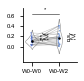

In [ ]:
plot_W0_W2_violins_with_histograms(r_vals_longi_dict_inst,[results['W0-W0 (inst) ST']['shuffled_means'],
                            results['W0-W2 (inst) ST']['shuffled_means']], "SST", palette=[IN_COLOR, IN_COLOR_weak],
                            ylabel="", yticks=[0,0.2,0.4,0.6], ylims=(-0.3, 0.75),
                            save_path=False,
                            SVG_TICKS=SVG_TICKS, SVG_LABELS=SVG_LABELS,figsize_mm=(25, 25),offset=0.4,title='')
fig = plt.gcf()
# fig.savefig(fr"Z:/Adam-Lab-Shared/Presentations/Rotem/PPT slides of data by subjects\vectorized_figures\5- Longi\Panels\speed_corr_violin\{strain}_W0_W2_inst_R_diffs_longi.svg",
#             format='svg', bbox_inches='tight', dpi=300)